# Working with DataFrames & Series - indexes

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:\\Users\\Matt Macarty\\Downloads\\movies")
titles = pd.read_csv('titles.csv')
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [4]:
%%time
cast = pd.read_csv('cast.csv')

Wall time: 12.3 s


In [5]:
len(cast)

3442902

In [6]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


In [7]:
cast.iloc[10]

title        When the Man Went South
year                            2014
name              Taipaleti 'Atu'ake
type                           actor
character     Two Palms - Ua'i Paame
n                                8.0
Name: 10, dtype: object

In [8]:
cast.loc[10]

title        When the Man Went South
year                            2014
name              Taipaleti 'Atu'ake
type                           actor
character     Two Palms - Ua'i Paame
n                                8.0
Name: 10, dtype: object

In [10]:
%%time
cast[cast.title =="Sleuth"]

Wall time: 569 ms


,title,year,name,type,character,n
238747,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
299291,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
299292,Sleuth,2007,Michael Caine,actor,Andrew,1.0
342151,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
342152,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1183659,Sleuth,2007,Jude Law,actor,Milo,2.0
1325945,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1341313,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1560814,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1652936,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [13]:
# indexes are better if they are ordered
# index takes time to build but after that it operates much faster
# when I do this Python uses a different method of finding -does not do it
# 3.7 million times
c = cast.set_index(['title']).sort_index()

In [15]:
%%time
c.loc['Sleuth']

Wall time: 0 ns


,year,name,type,character,n
title,,,,,
Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,2007,Jude Law,actor,Milo,2.0


In [16]:
c = cast.set_index(['title', 'year']).sort_index()
c.head()

name     type       character    n
title year                                               
#211  2018     Sapir Azulay  actress          Jacobs  NaN
      2018           Bleona  actress       Christine  NaN
      2018     Amanda Cerny  actress           Sarah  9.0
      2018  Mackenzie Evans  actress            Girl  NaN
      2018    Liza Mircheva  actress  Elizabeth Grey  NaN

In [19]:
c.loc['The Wizard of Oz', 1939]

name     type              character     n
title            year                                                       
The Wizard of Oz 1939    Franz Balluck    actor      Munchkin Villager   NaN
                 1939   Charles Becker    actor         Munchkin Mayor   NaN
                 1939   Billy Bletcher    actor                  Mayor   NaN
                 1939   Billy Bletcher    actor  Lollipop Guild Member   NaN
                 1939       Ray Bolger    actor                 'Hunk'   3.0
...                                ...      ...                    ...   ...
                 1939     Alta Stevens  actress      Munchkin Villager   NaN
                 1939     Betty Tanner  actress      Munchkin Villager   NaN
                 1939      Terry (III)  actress                   Toto  11.0
                 1939    Marie Winters  actress      Munchkin Villager   NaN
                 1939  Gladys V. Wolff  actress      Munchkin Villager   NaN

[130 rows x 4 columns]

In [20]:
c.loc['The Wizard of Oz', 1939].reset_index('year')

,year,name,type,character,n
title,,,,,
The Wizard of Oz,1939,Franz Balluck,actor,Munchkin Villager,NaN
The Wizard of Oz,1939,Charles Becker,actor,Munchkin Mayor,NaN
The Wizard of Oz,1939,Billy Bletcher,actor,Mayor,NaN
The Wizard of Oz,1939,Billy Bletcher,actor,Lollipop Guild Member,NaN
The Wizard of Oz,1939,Ray Bolger,actor,'Hunk',3.0
...,...,...,...,...,...
The Wizard of Oz,1939,Alta Stevens,actress,Munchkin Villager,NaN
The Wizard of Oz,1939,Betty Tanner,actress,Munchkin Villager,NaN
The Wizard of Oz,1939,Terry (III),actress,Toto,11.0


In [21]:
c.loc['The Wizard of Oz', 1939]

name     type              character     n
title            year                                                       
The Wizard of Oz 1939    Franz Balluck    actor      Munchkin Villager   NaN
                 1939   Charles Becker    actor         Munchkin Mayor   NaN
                 1939   Billy Bletcher    actor                  Mayor   NaN
                 1939   Billy Bletcher    actor  Lollipop Guild Member   NaN
                 1939       Ray Bolger    actor                 'Hunk'   3.0
...                                ...      ...                    ...   ...
                 1939     Alta Stevens  actress      Munchkin Villager   NaN
                 1939     Betty Tanner  actress      Munchkin Villager   NaN
                 1939      Terry (III)  actress                   Toto  11.0
                 1939    Marie Winters  actress      Munchkin Villager   NaN
                 1939  Gladys V. Wolff  actress      Munchkin Villager   NaN

[130 rows x 4 columns]

In [22]:
# equivalent to c = c.reset_index()
c.reset_index(inplace = True)

In [25]:
c = cast[cast.name == 'Sylvester Stallone']
len(c)

71

In [29]:
c.sort_values(by='year').groupby(['year', 'title', 'character']).first().head(10)

name  \
year title                         character                                     
1970 Pigeons                       Party Guest              Sylvester Stallone   
     Rebel                         Jerry Savage             Sylvester Stallone   
     The Party at Kitty and Stud's Stud                     Sylvester Stallone   
1971 Bananas                       Subway Thug #1           Sylvester Stallone   
1974 The Lords of Flatbush         Stanley Rosiello         Sylvester Stallone   
1975 Capone                        Frank Nitti              Sylvester Stallone   
     Death Race 2000               Machine Gun Joe Viterbo  Sylvester Stallone   
     Farewell, My Lovely           Jonnie                   Sylvester Stallone   
     The Prisoner of Second Avenue Youth in Park            Sylvester Stallone   
1976 Cannonball!                   Mafioso                  Sylvester Stallone   

                                                             type     n  
year title                         character                             
1970 Pigeons                       Party Guest              actor   NaN  
     Rebel                         Jerry Savage             actor   1.0  
     The Party at Kitty and Stud's Stud                     actor   1.0  
1971 Bananas                       Subway Thug #1           actor   NaN  
1974 The Lords of Flatbush         Stanley Rosiello         actor   2.0  
1975 Capone                        Frank Nitti              actor   4.0  
     Death Race 2000               Machine Gun Joe Viterbo  actor   3.0  
     Farewell, My Lovely           Jonnie                   actor   9.0  
     The Prisoner of Second Avenue Youth in Park            actor  19.0  
1976 Cannonball!                   Mafioso                  actor   NaN

In [31]:
c.sort_values(by='year').groupby(['year']).size().head(10)

year
1970    3
1971    1
1974    1
1975    4
1976    2
1978    2
1979    1
1981    2
1982    2
1983    1
dtype: int64

<AxesSubplot:xlabel='year'>

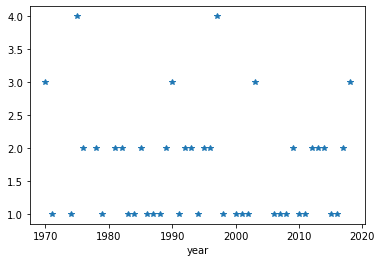

In [35]:
c.sort_values(by='year').groupby(['year']).size().plot(style="*")

In [37]:
new_variable = c.sort_values(by='year').groupby(['year']).size().head(10)

year
1970    3
1971    1
1974    1
1975    4
1976    2
1978    2
1979    1
1981    2
1982    2
1983    1
1984    1
1985    2
1986    1
1987    1
1988    1
1989    2
1990    3
1991    1
1992    2
1993    2
1994    1
1995    2
1996    2
1997    4
1998    1
2000    1
2001    1
2002    1
2003    3
2006    1
2007    1
2008    1
2009    2
2010    1
2011    1
2012    2
2013    2
2014    2
2015    1
2016    1
2017    2
2018    3
dtype: int64

In [39]:
c.sort_values(by='year').groupby('year').n.min()

year
1970     1.0
1971     NaN
1974     2.0
1975     3.0
1976     1.0
1978     1.0
1979     1.0
1981     1.0
1982     1.0
1983     NaN
1984     1.0
1985     1.0
1986     1.0
1987     1.0
1988     1.0
1989     1.0
1990     1.0
1991     5.0
1992     1.0
1993     1.0
1994     1.0
1995     1.0
1996     1.0
1997     1.0
1998    11.0
2000     1.0
2001     1.0
2002     1.0
2003     7.0
2006     1.0
2007     NaN
2008     1.0
2009     NaN
2010     1.0
2011    33.0
2012     1.0
2013     1.0
2014     1.0
2015     2.0
2016    11.0
2017     6.0
2018     NaN
Name: n, dtype: float64

In [40]:
c.groupby(c.year // 10 * 10).size()

year
1970    14
1980    13
1990    18
2000    11
2010    15
dtype: int64

In [42]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27396
      actress     15733
1920  actor       48112
      actress     23826
1930  actor      149272
      actress     49298
1940  actor      159799
      actress     50871
1950  actor      153559
      actress     56331
1960  actor      128132
      actress     54484
1970  actor      142015
      actress     60977
1980  actor      177064
      actress     80619
1990  actor      245713
      actress    115505
2000  actor      440810
      actress    235217
2010  actor      645548
      actress    382288
2020  actor         134
      actress       123
2110  actor           2
      actress         1
dtype: int64

In [45]:
c = c[c.year < 2018]
unstacked = c.groupby([c.year // 10 * 10, 'type']).size().unstack()

<AxesSubplot:xlabel='year'>

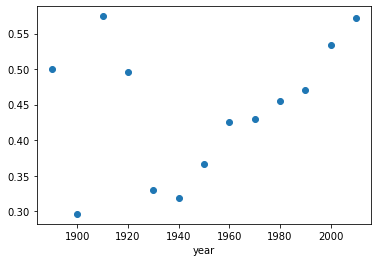

In [46]:
(unstacked['actress'] / unstacked['actor']).plot(style='o')

<AxesSubplot:xlabel='year'>

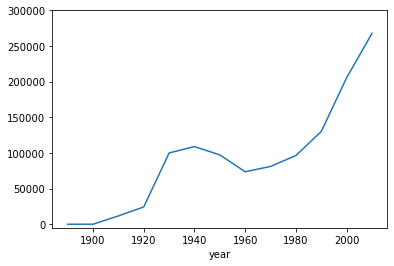

In [48]:
(unstacked['actor'] - unstacked['actress']).plot(ylim=(-5000, 300000))

In [49]:
release = pd.read_csv('release_dates.csv',
                     parse_dates = ['date'],
                     infer_datetime_format =True)
release.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    443486 non-null  object        
 1   year     443486 non-null  int64         
 2   country  443486 non-null  object        
 3   date     443486 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 13.5+ MB


In [50]:
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [52]:
r = release
r.date.dt.dayofweek

0         4
1         3
2         3
3         1
4         2
         ..
443481    4
443482    4
443483    4
443484    4
443485    4
Name: date, Length: 443486, dtype: int64

In [53]:
c

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0


In [56]:
c = cast[cast.name == 'Sylvester Stallone']
dates = c.merge(r)
dates[dates.country == 'USA'].date.dt.dayofweek

0       4
3       4
11      4
13      4
77      4
133     4
162     1
172     2
183     4
204     4
227     4
260     2
312     2
313     4
344     6
354     4
380     4
452     4
489     4
498     4
509     4
531     4
561     2
651     4
654     4
684     4
685     4
706     2
751     4
771     4
788     4
807     4
824     4
839     2
852     4
892     2
911     2
949     4
972     1
976     4
984     4
1008    2
1052    4
1075    4
1096    2
1118    4
1143    6
1147    4
1164    4
1202    4
1220    4
1236    4
1299    4
1366    4
1437    4
1484    4
1508    4
1568    4
1590    4
Name: date, dtype: int64

# Problems

#### 1. Plot the number of films released each decade over time 

<AxesSubplot:xlabel='year'>

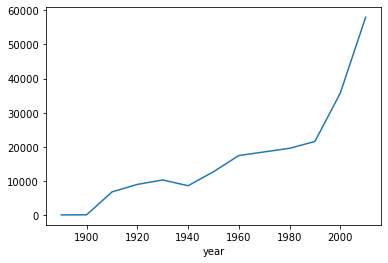

In [61]:
titles[titles.year < 2018].groupby(titles.year // 10 * 10).size().plot()

#### 2. How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 2000's?

<AxesSubplot:xlabel='year'>

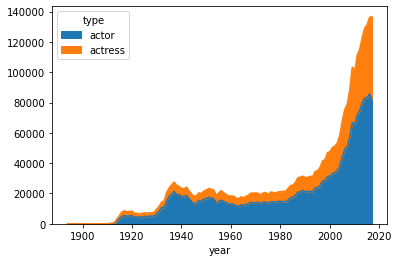

In [66]:
c = cast[cast.year < 2018]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area')

#### 3. In the 2000's decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 4?

In [69]:
c = cast[(cast.n < 5) & (cast.year> 1999) & (cast.year < 2010)]
c.groupby(['type', 'n']).size().unstack('n')

n,1.0,2.0,3.0,4.0
type,,,,
actor,16895,12169,12698,12153
actress,6698,9978,8131,7508


#### 4. Plot the fraction of actor roles relative to total roles over time, hint you may need to adjust the ylim to get a meaningful plot 

<AxesSubplot:xlabel='year'>

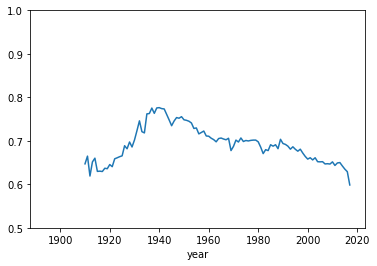

In [73]:
c = cast[cast.year < 2018]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=(.5,1))

#### 5. Plot the fraction of supporting roles (n = 2) for actors over time

#### 6. Plot the fraction of roles n = 1,2, or 3 over time. Each should be a separate line

#### 7. When are Tom Cruise movies typically released (month)? 